In [56]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve 
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [58]:
data = pd.read_csv('C:/Users/KIIT/Desktop/Research/CTR&TI/Models/dataset/Length_Conversion.csv')

In [60]:
data

,S.No.,filename,Length (cm),Original Length,ratio
0,0,DSC04382.JPG,21.801667,5.25,4.152698
1,1,DSC04384.JPG,22.277917,5.25,4.243413
2,2,DSC04385.JPG,23.865417,5.88,4.058744
3,3,DSC04386.JPG,22.648333,5.88,3.851757
4,4,DSC04387.JPG,21.828125,4.99,4.374374
...,...,...,...,...,...
663,663,DSC05081.JPG,22.727708,5.00,4.545542
664,664,DSC05082.JPG,20.690417,5.40,3.831559
665,665,DSC05083.JPG,20.028958,5.40,3.709066
666,666,DSC05084.JPG,22.066250,5.18,4.259894


In [62]:
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'DSC04382.JPG'

In [64]:
X = data[['Length (cm)', 'ratio']]
y = data['Original Length']

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [70]:
alpha_values = np.logspace(-3, 0, 100)
model = Lasso()
param_grid = {'alpha':alpha_values}
mse_scoring = make_scorer(mean_squared_error, greater_is_better = False)
r2_scoring = make_scorer(r2_score, greater_is_better = True)
scorers = {
    'mse': mse_scoring,
    'r2': r2_scoring
}
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=5, scoring=scorers, refit='r2', n_jobs=-1, verbose=2)

In [77]:
grid_search.fit(X_train, Y_train)
best_alpha = grid_search.best_params_
print(f'Best alpha value: {best_alpha}')
best_lasso_model = grid_search.best_estimator_
best_lasso_model.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha value: {'alpha': 0.001}


Lasso(alpha=0.001)

In [79]:
Y_pred = best_lasso_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
r2= r2_score(Y_test, Y_pred)
print(f'R-squared error: {r2}')
rmse = np.sqrt(mse)
print(f'Root Mean Sqaured Error: {rmse}') 
# mae = mean_absolute_error(Y_test, Y_pred)
# print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.0013967061664472388
R-squared error: 0.9852555868610878
Root Mean Sqaured Error: 0.0373725322455843


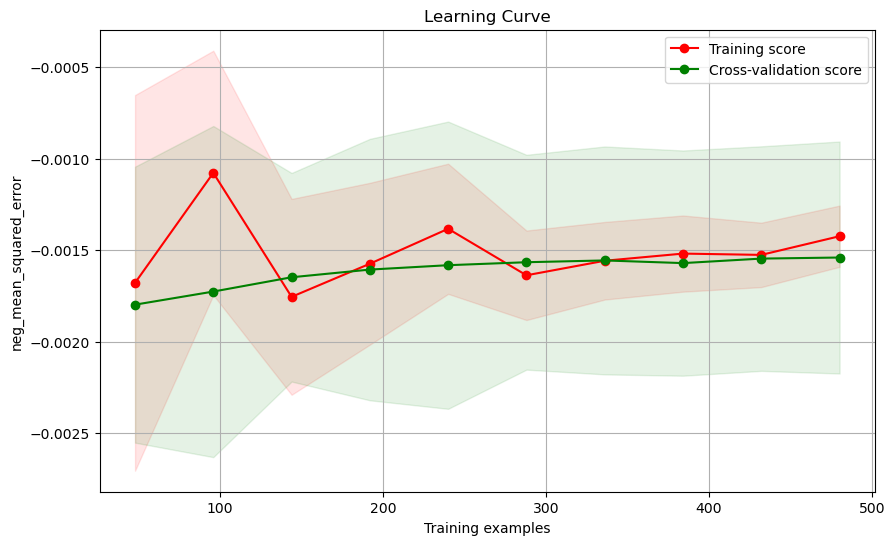

In [33]:
def plot_learning_curve(estimator, X, y, cv, scoring, n_jobs):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("neg_mean_squared_error")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Plotting the learning curve for Lasso regression
plot_learning_curve(best_lasso_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



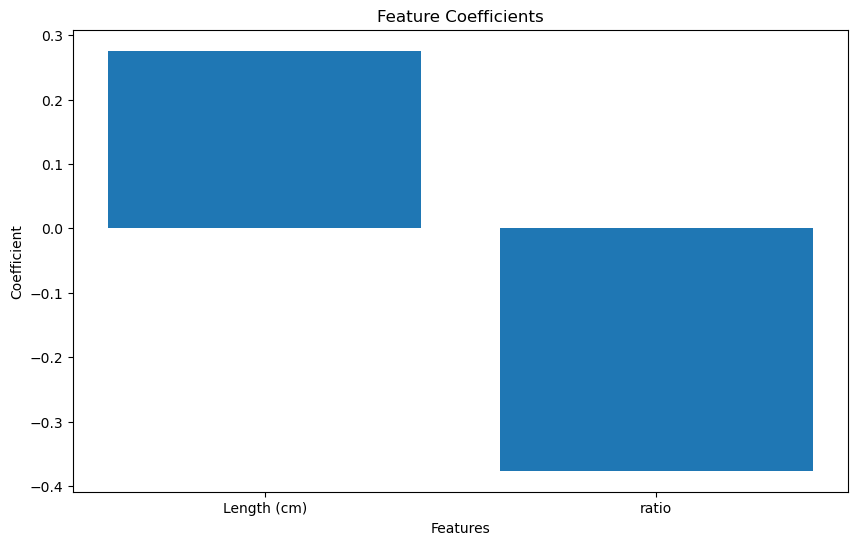

In [47]:
# Coefficient plot
plt.figure(figsize=(10, 6))
coefficients = best_lasso_model.coef_
features = ['Length (cm)','ratio']
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
plt.show()

In [39]:
joblib.dump(best_lasso_model, 'Length_predictor_lasso.joblib')

['Length_predictor_lasso.joblib']